# L3 Forward Kinematics

*License: CC-BY-NC-SA 4.0*

*Author: Murilo M. Marinho (murilo.marinho@manchester.ac.uk)*

## Pre-requisites
The user of this notebook is expected to have prior knowledge in
- All the content and pre-requisites of lessons 1 and 2.

## I found an issue
Thank you! Please report it at https://github.com/MarinhoLab/OpenExecutableBooksRobotics/issues

#### Latex Macros
$\providecommand{\myvec}[1]{{\mathbf{\boldsymbol{{#1}}}}}$
$\providecommand{\mymatrix}[1]{{\mathbf{\boldsymbol{{#1}}}}}$

# Pre-requisites

In [1]:
%%capture
%pip install numpy
%pip install numpy --break-system-packages
%pip install roboticstoolbox-python
%pip install roboticstoolbox-python --break-system-packages

# Imports

In [2]:
import numpy as np
import spatialmath as sm
from math import pi, sin, cos

# 2 DoF planar robot (RR) -- Calculating its forward kinematics using numpy and spatialmath

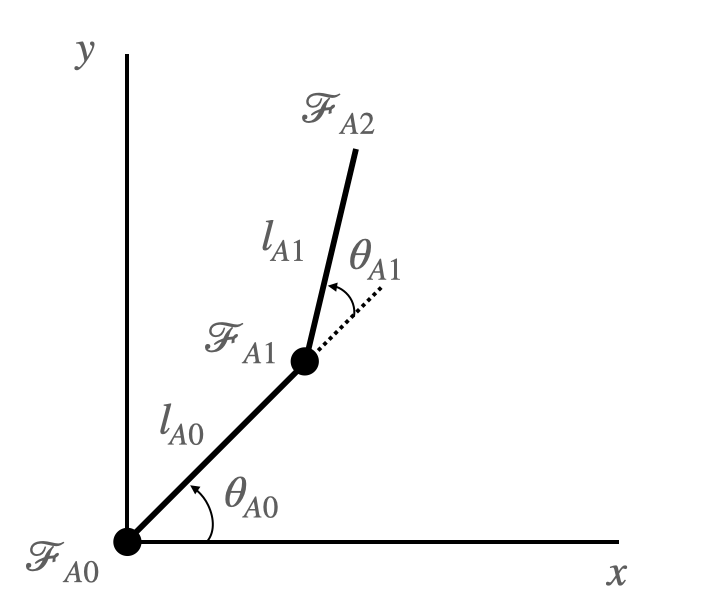

For the 2-DoF planar robot shown in the figure, use $\theta_{A0}$, $\theta_{A1}$, $l_{A0}$, $l_{A1}$ to calculate
$$\mymatrix{H}_{A1}( \theta_{A0},l_{A0} ) \in SE(3)$$
and
$$\mymatrix{H}_{A2}( \theta_{A0}, l_{A0},\theta_{A1},l_{A1}) \in SE(3),$$
given that the pose of $\mathcal{F}_{A0}$ is $SE(3) \ni \mymatrix{H}_{A0} \triangleq \mymatrix{I}_4$.

## Step 1: Understanding the problem

There is not much we can do without understanding what is being asked. In this regard, it is important to read and understand as much as possible the content already given. The programming part is extremely simple after the math is understood.

As described, the problem in question is that, for each joint transformation, we have a rotation followed by a translation.

## Step 2: Calculating the first joint transformation

$$\myvec H_{A1}^{A0}\left(\theta_{A0}\right)	=\begin{bmatrix}\mymatrix R\left(\theta_{A0}\right) & 0\\
\myvec 0 & 1
\end{bmatrix}\begin{bmatrix}\mymatrix I & \begin{bmatrix}l_{A0}\\
0
\end{bmatrix}\\
\myvec 0 & 1
\end{bmatrix}.$$

Programatically, supposing that $\theta_{A0} = \pi/4$ and $l_{A0}=0.3$ and if we define the initial rotation as $\mymatrix{H}_{R,A0}$, we have

In [3]:
# Defining the rotation for A0. Note the correct syntax and, if well spaced, how easy it is to read
H_R_A0 = np.array(
        [[cos(pi/4), -sin(pi/4),  0,    0],
         [sin(pi/4),  cos(pi/4),  0,    0],
         [0,         0,           1,    0],
         [0,         0,           0,    1]]
)

print(f"The rotation is\n\n H_R_A0 = \n{H_R_A0}")

The rotation is

 H_R_A0 = 
[[ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


and if we define the translation as $ \mymatrix{H}_{T,A0}$, programmatically we have

In [4]:
H_T_A0 = np.array(
        [[1, 0, 0, 0.3],
         [0, 1, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1]]
)

print(f"The translation is\n\n H_T_A0 = \n{H_T_A0}")

The translation is

 H_T_A0 = 
[[1.  0.  0.  0.3]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]]


hence

In [5]:
# When using numpy, the multiplication is done using the @ mark
H_A0_A1 = H_R_A0 @ H_T_A0

print(f"The first joint transformation is\n\n H_A0_A1 = \n{H_A0_A1}")

The first joint transformation is

 H_A0_A1 = 
[[ 0.70710678 -0.70710678  0.          0.21213203]
 [ 0.70710678  0.70710678  0.          0.21213203]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


## Step 3: Calculating the second joint transformation

The second joint is, aside from parameters, the same as the first. Hence, the *relative* transformation is calculated similarly

$$ \myvec H_{A2}^{A1}\left(\theta_{A1}\right)	=\begin{bmatrix}\mymatrix R\left(\theta_{A1}\right) & 0\\
\myvec 0 & 1
\end{bmatrix}\begin{bmatrix}\mymatrix I & \begin{bmatrix}l_{A1}\\
0
\end{bmatrix}\\
\myvec 0 & 1
\end{bmatrix}.$$

Programatically, supposing that $\theta_{A1} = -\pi/14$ and $l_{A0}=0.95$ and if we define the initial rotation as $\mymatrix{H}_{R,A1}$, we have

In [6]:
H_R_A1 = np.array(
        [[cos(-pi/14), -sin(-pi/14),  0,    0],
         [sin(-pi/14),  cos(-pi/14),  0,    0],
         [0,            0,            1,    0],
         [0,            0,            0,    1]]
)
print(f"The rotation is\n\n H_R_A1 = \n{H_R_A1}")

The rotation is

 H_R_A1 = 
[[ 0.97492791  0.22252093  0.          0.        ]
 [-0.22252093  0.97492791  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


and if we define the translation as $\mymatrix{H}_{T,A1}$, programmatically we have

In [7]:
H_T_A1 = np.array(
        [[1, 0, 0, 0.95],
         [0, 1, 0, 0 ],
         [0, 0, 1, 0 ],
         [0, 0, 0, 1 ]]
)

print(f"The translation is\n\n H_T_A1 = \n{H_T_A1}")

The translation is

 H_T_A1 = 
[[1.   0.   0.   0.95]
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]


hence, the relative transformation is

In [8]:
H_A1_A2 = H_R_A1 @ H_T_A1

print(f"The second joint transformation is\n\n H_A1_A2 = \n{H_A1_A2}")

The second joint transformation is

 H_A1_A2 = 
[[ 0.97492791  0.22252093  0.          0.92618152]
 [-0.22252093  0.97492791  0.         -0.21139489]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


## Step 4: Calculating final transformations

The problem is quite simple to solve after the relative transformations are known. 

We know that

$$ \mymatrix{H}_{A1}( \theta_{A0},l_{A0} ) = \mymatrix{H}^{A0}_{A1}$$

and that

$$ \mymatrix{H}_{A2}( \theta_{A0}, l_{A0},\theta_{A1},l_{A1}) = \mymatrix{H}^{A0}_{A1}\mymatrix{H}^{A1}_{A2}$$

hence

In [9]:
H_A1 = H_A0_A1
H_A2 = H_A0_A1 @ H_A1_A2

print(f"The first transformation is\n\n H_A1 = \n{H_A1}")
print(f"The second transformation is\n\n H_A2 = \n{H_A2}")

The first transformation is

 H_A1 = 
[[ 0.70710678 -0.70710678  0.          0.21213203]
 [ 0.70710678  0.70710678  0.          0.21213203]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
The second transformation is

 H_A2 = 
[[ 0.8467242  -0.53203208  0.          1.01652002]
 [ 0.53203208  0.8467242   0.          0.71756251]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


## The same, but with spatialmath

With spatialmath, the whole process is trivial.


H_A1_sm =    0.7071   -0.7071    0         0.2121    
   0.7071    0.7071    0         0.2121    
   0         0         1         0         
   0         0         0         1         

H_A2_sm =    0.8467   -0.532     0         1.017     
   0.532     0.8467    0         0.7176    
   0         0         1         0         
   0         0         0         1         



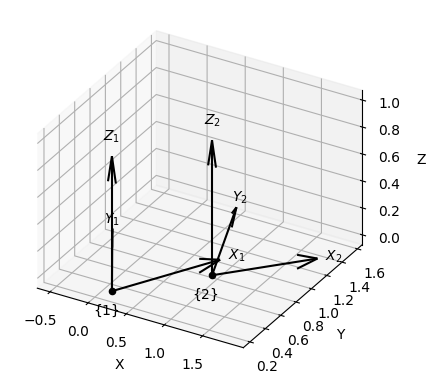

In [10]:
H_A1_sm = sm.SE3.Rz(pi/4) * sm.SE3(0.3,0,0)
H_A2_sm = H_A1_sm * sm.SE3.Rz(-pi/14) * sm.SE3(0.95,0,0)

print(f"H_A1_sm = {H_A1_sm}")
print(f"H_A2_sm = {H_A2_sm}")

H_A1_sm.plot(frame='1', color='black')
H_A2_sm.plot(frame='2', color='black')

and programmaticaly can be compared

In [11]:
if np.allclose(H_A1_sm.A, H_A1):
    print("The numpy and spatialmath results are the same for H_A1")
else:
    raise Exception("The numpy and spatialmath results are not the same for H_A1")

if np.allclose(H_A2_sm.A, H_A2):
    print("The numpy and spatialmath results are the same for H_A2")
else:
    raise Exception("The numpy and spatialmath results are not the same for H_A2")

The numpy and spatialmath results are the same for H_A1
The numpy and spatialmath results are the same for H_A2




# Further study

1. What about if the robot had 3 degrees-of-freedom, that is RRR?
2. What about if the robot had n degrees-of-freedom? Would it be much more complicated to solve?
3. What if the robot has one or more prismatic joints?